<a href="https://colab.research.google.com/github/Ihtisham009/Final-Project-MS-data-Science-/blob/main/FYP_18_dec_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Subjective Health and Daily Wellbeing from Socioeconomic and Demographic Data**


## **Introduction**
This project aims to predict subjective health and daily wellbeing based on socioeconomic and demographic data. The primary objective is to identify the most significant predictors of subjective wellbeing, including variables such as income, education, employment status, age, and gender. By employing machine learning classification models, the project will assess the performance of these models in categorizing individuals as having high or low subjective wellbeing. The study will also examine the use of advanced categorical encoding techniques and their impact on model accuracy.

## **Research Questions:**
**1. To what extent can socioeconomic and demographic features (e.g., income, education, employment status, age, gender) classify individuals as having high or low subjective wellbeing?**

**2. Which socioeconomic or demographic variables emerge as the strongest predictors of subjective wellbeing, and do these align with findings in wellbeing and social science literature?**

**3. Does the inclusion of dummy variables and advanced categorical encoding techniques significantly improve the predictive performance of classification models compared to simpler encodings?**



# **Import Libraries and Load the Dataset**
We start by importing all required Python libraries and loading the Excel file (`Raw Data.xlsx`) into a pandas DataFrame.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from time import perf_counter
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.preprocessing import label_binarize
from sklearn.metrics import (
    accuracy_score, f1_score, classification_report, confusion_matrix,
    ConfusionMatrixDisplay, roc_curve, auc
)

from time import time

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    classification_report, roc_curve, auc, roc_auc_score,
    accuracy_score, f1_score
)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


# Load Excel file (second row contains headers)
df = pd.read_excel("/content/Raw Data.xlsx", header=1)
print("Original shape:", df.shape)
df.head()


Original shape: (1306, 42)


,1. Year of birth:,2. Gender,3. What is the socio-economic status of your home?,"4. According to your culture, people, or physical features, you are or are recognized as:",5.1 How many years of education did your parents receive? Father,5.2 How many years of education did your parents receive? Mother,"6. In general, how satisfied are you with all aspects of your life?",7. How happy did you feel yesterday?,8. How much did you laugh yesterday?,9. Did you learn new or exciting things yesterday?,...,"17.7 Next, you will be asked questions about your emotional state. Please answer on a scale of 0 to 3, where 0 is 'Not at all', 1 is 'several days', 2 is 'more than half of the days', and 3 is 'Nearly every day'. Over the last two weeks, how often have you been bothered by the following problems?: Feeling afraid, as if something awful might happen","18.1 Next, you will be asked questions about your emotional state. Please answer on a scale of 0 to 3, where 0 is 'Not at all', 1 is 'several days', 2 is 'more than half of the days', and 3 is 'Nearly every day'. Over the last two weeks, how often have you been bothered by the following problems?: Little interest or pleasure in doing things","18.2 Next, you will be asked questions about your emotional state. Please answer on a scale of 0 to 3, where 0 is 'Not at all', 1 is 'several days', 2 is 'more than half of the days', and 3 is 'Nearly every day'. Over the last two weeks, how often have you been bothered by the following problems?: Feeling down, depressed, or hopeless","18.3 Next, you will be asked questions about your emotional state. Please answer on a scale of 0 to 3, where 0 is 'Not at all', 1 is 'several days', 2 is 'more than half of the days', and 3 is 'Nearly every day'. Over the last two weeks, how often have you been bothered by the following problems?: Trouble falling or staying asleep, or sleeping too much","18.4 Next, you will be asked questions about your emotional state. Please answer on a scale of 0 to 3, where 0 is 'Not at all', 1 is 'several days', 2 is 'more than half of the days', and 3 is 'Nearly every day'. Over the last two weeks, how often have you been bothered by the following problems?: Feeling tired or having little energy","18.5 Next, you will be asked questions about your emotional state. Please answer on a scale of 0 to 3, where 0 is 'Not at all', 1 is 'several days', 2 is 'more than half of the days', and 3 is 'Nearly every day'. Over the last two weeks, how often have you been bothered by the following problems?: Poor appetite or overeating","18.6 Next, you will be asked questions about your emotional state. Please answer on a scale of 0 to 3, where 0 is 'Not at all', 1 is 'several days', 2 is 'more than half of the days', and 3 is 'Nearly every day'. Over the last two weeks, how often have you been bothered by the following problems?: Feeling bad about yourself or that you are a failure or have let yourself or your family down","18.7 Next, you will be asked questions about your emotional state. Please answer on a scale of 0 to 3, where 0 is 'Not at all', 1 is 'several days', 2 is 'more than half of the days', and 3 is 'Nearly every day'. Over the last two weeks, how often have you been bothered by the following problems?: Trouble concentrating on things, such as reading the newspaper or watching television","18.8 Next, you will be asked questions about your emotional state. Please answer on a scale of 0 to 3, where 0 is 'Not at all', 1 is 'several days', 2 is 'more than half of the days', and 3 is 'Nearly every day'. Over the last two weeks, how often have you been bothered by the following problems?: Moving or speaking so slowly that other people could have noticed. Or the opposite being so figety or restless that you have been moving around a lot more than usual","18.9 Next, you will be asked questions about your emotional state. Please answer on a scale of 0 to 3, where 0 is 'Not at all', 1 is 'several days', 2 is 'more than half of the days', and 3

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Clean Column Names**
We remove special characters, extra spaces, and replace them with underscores for uniformity.


In [4]:
# Clean column names by removing numbers, special characters, and extra spaces
def clean_col_names(df):
    cols = df.columns
    new_cols = []
    for col in cols:
        # Remove leading numbers and periods, then strip whitespace
        new_col = col.split('. ')[-1].strip()
        # Replace spaces and special characters with underscores
        new_col = new_col.replace(' ', '_').replace('?', '').replace(':', '').replace(',', '').replace('-', '_').replace('(', '').replace(')', '').replace('.', '')
        new_cols.append(new_col)
    df.columns = new_cols
    return df

df = clean_col_names(df)
print("Cleaned shape:", df.shape)
df.head()

Cleaned shape: (1306, 42)


,Year_of_birth,Gender,What_is_the_socio_economic_status_of_your_home,According_to_your_culture_people_or_physical_features_you_are_or_are_recognized_as,51_How_many_years_of_education_did_your_parents_receive_Father,52_How_many_years_of_education_did_your_parents_receive_Mother,In_general_how_satisfied_are_you_with_all_aspects_of_your_life,How_happy_did_you_feel_yesterday,How_much_did_you_laugh_yesterday,Did_you_learn_new_or_exciting__things_yesterday,...,Over_the_last_two_weeks_how_often_have_you_been_bothered_by_the_following_problems_Feeling_afraid_as_if_something_awful_might_happen,Over_the_last_two_weeks_how_often_have_you_been_bothered_by_the_following_problems_Little_interest_or_pleasure_in_doing_things,Over_the_last_two_weeks_how_often_have_you_been_bothered_by_the_following_problems_Feeling_down_depressed_or_hopeless,Over_the_last_two_weeks_how_often_have_you_been_bothered_by_the_following_problems_Trouble_falling_or_staying_asleep_or_sleeping_too_much,Over_the_last_two_weeks_how_often_have_you_been_bothered_by_the_following_problems_Feeling_tired_or_having_little_energy,Over_the_last_two_weeks_how_often_have_you_been_bothered_by_the_following_problems_Poor_appetite_or_overeating,Over_the_last_two_weeks_how_often_have_you_been_bothered_by_the_following_problems_Feeling_bad_about_yourself_or_that_you_are_a_failure_or_have_let_yourself_or_your_family_down,Over_the_last_two_weeks_how_often_have_you_been_bothered_by_the_following_problems_Trouble_concentrating_on_things_such_as_reading_the_newspaper_or_watching_television,Or_the_opposite_being_so_figety_or_restless_that_you_have_been_moving_around_a_lot_more_than_usual,Over_the_last_two_weeks_how_often_have_you_been_bothered_by_the_following_problems_Thoughts_that_you_would_be_better_off_dead_or_of_hurting_yourself
0,1962.0,1.0,2.0,5.0,NaN,NaN,10,10.0,5.0,10.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1970.0,1.0,2.0,5.0,NaN,NaN,7,10.0,10.0,5.0,...,0.0,0.0,0,2.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1975.0,1.0,3.0,6.0,NaN,NaN,10,10.0,10.0,10.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1959.0,1.0,3.0,5.0,NaN,NaN,1,10.0,6.0,6.0,...,0.0,1.0,0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
4,1959.0,1.0,3.0,6.0,NaN,NaN,10,10.0,10.0,8.0,...,0.0,0.0,0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


# **Identify Relevant Columns**
We automatically detect wellbeing-related and demographic columns based on keyword search.


In [5]:
def find_columns(df_cols, include_any=None):
    if include_any is None:
        return []
    incl = [k.lower() for k in include_any]
    return [c for c in df_cols if any(k in c.lower() for k in incl)]

cols_happy = find_columns(df.columns, ["happy"])
cols_satisfied = find_columns(df.columns, ["satisfied"])
cols_enjoy = find_columns(df.columns, ["enjoy"])
cols_laugh = find_columns(df.columns, ["laugh"])
cols_depressed = find_columns(df.columns, ["depressed", "hopeless"])
cols_worry = find_columns(df.columns, ["worry"])
cols_stress = find_columns(df.columns, ["stress"])
cols_lonely = find_columns(df.columns, ["lonely"])

demo_year = find_columns(df.columns, ["year_of_birth"])
demo_gender = find_columns(df.columns, ["gender"])
demo_ses = find_columns(df.columns, ["socio", "income"])
demo_culture = find_columns(df.columns, ["culture"])
demo_parent_edu = find_columns(df.columns, ["father", "mother", "education"])

print("Positive wellbeing columns:", cols_happy + cols_satisfied + cols_enjoy + cols_laugh)
print("Negative wellbeing columns:", cols_depressed + cols_worry + cols_stress + cols_lonely)
print("Demographic columns:", demo_year + demo_gender + demo_ses + demo_culture + demo_parent_edu)


Positive wellbeing columns: ['How_happy_did_you_feel_yesterday', 'In_general_how_satisfied_are_you_with_all_aspects_of_your_life', 'How_much_did_you_enjoy_the_activities_you_did_yesterday', 'How_much_did_you_laugh_yesterday']
Negative wellbeing columns: ['How_depressed_did_you_feel_yesterday', 'Over_the_last_two_weeks_how_often_have_you_been_bothered_by_the_following_problems_Feeling_down_depressed_or_hopeless', 'Over_the_last_two_weeks_how_often_have_you_been_bothered_by_the_following_problems_Not_being_able_to_stop_or_control_worrying', 'Over_the_last_two_weeks_how_often_have_you_been_bothered_by_the_following_problems_Worrying_too_much_about_different_things', 'How_much_stress_did_you_feel_yesterday', "Please_answer_on_a_scale_of_0_to_4_where_0_is_never_1_is_'almost_never'_2_is_'sometimes'_3_is_'fairly_often'_and_4_is_'very_often'_how_often_you_experienced_the_following_feelings_during_the_last_month_how_often_have_you_felt_nervous_and_stressed", 'How_lonely_or_unsupported_did_you_f

#  **Convert to Numeric and Build Wellbeing Score**
Convert identified wellbeing columns to numeric, reverse the negative ones, and compute a composite wellbeing score.


In [6]:
def to_numeric(df, cols):
    for c in cols:
        if c in df.columns:
            df[c] = pd.to_numeric(df[c], errors="coerce")
    return df

def reverse_score(series):
    s = pd.to_numeric(series, errors="coerce")
    max_val = 10 if s.max(skipna=True) > 5 else 4
    return max_val - s

pos_cols = cols_happy + cols_satisfied + cols_enjoy + cols_laugh
neg_cols = cols_depressed + cols_worry + cols_stress + cols_lonely

df = to_numeric(df, pos_cols + neg_cols)

pos_df = df[pos_cols]
neg_df = df[neg_cols].apply(reverse_score)

wellbeing_all = pd.concat([pos_df, neg_df], axis=1)
df["Wellbeing_Score"] = wellbeing_all.mean(axis=1)
df["Wellbeing_Label"] = (df["Wellbeing_Score"] >= df["Wellbeing_Score"].median()).astype(int)
df[["Wellbeing_Score", "Wellbeing_Label"]].head()


,Wellbeing_Score,Wellbeing_Label
0,7.272727,1
1,6.909091,1
2,7.727273,1
3,5.181818,0
4,7.545455,1


In [7]:
df

,Year_of_birth,Gender,What_is_the_socio_economic_status_of_your_home,According_to_your_culture_people_or_physical_features_you_are_or_are_recognized_as,51_How_many_years_of_education_did_your_parents_receive_Father,52_How_many_years_of_education_did_your_parents_receive_Mother,In_general_how_satisfied_are_you_with_all_aspects_of_your_life,How_happy_did_you_feel_yesterday,How_much_did_you_laugh_yesterday,Did_you_learn_new_or_exciting__things_yesterday,...,Over_the_last_two_weeks_how_often_have_you_been_bothered_by_the_following_problems_Feeling_down_depressed_or_hopeless,Over_the_last_two_weeks_how_often_have_you_been_bothered_by_the_following_problems_Trouble_falling_or_staying_asleep_or_sleeping_too_much,Over_the_last_two_weeks_how_often_have_you_been_bothered_by_the_following_problems_Feeling_tired_or_having_little_energy,Over_the_last_two_weeks_how_often_have_you_been_bothered_by_the_following_problems_Poor_appetite_or_overeating,Over_the_last_two_weeks_how_often_have_you_been_bothered_by_the_following_problems_Feeling_bad_about_yourself_or_that_you_are_a_failure_or_have_let_yourself_or_your_family_down,Over_the_last_two_weeks_how_often_have_you_been_bothered_by_the_following_problems_Trouble_concentrating_on_things_such_as_reading_the_newspaper_or_watching_television,Or_the_opposite_being_so_figety_or_restless_that_you_have_been_moving_around_a_lot_more_than_usual,Over_the_last_two_weeks_how_often_have_you_been_bothered_by_the_following_problems_Thoughts_that_you_would_be_better_off_dead_or_of_hurting_yourself,Wellbeing_Score,Wellbeing_Label
0,1962.0,1.0,2.0,5.0,NaN,NaN,10,10.0,5.0,10.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.272727,1
1,1970.0,1.0,2.0,5.0,NaN,NaN,7,10.0,10.0,5.0,...,0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,6.909091,1
2,1975.0,1.0,3.0,6.0,NaN,NaN,10,10.0,10.0,10.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.727273,1
3,1959.0,1.0,3.0,5.0,NaN,NaN,1,10.0,6.0,6.0,...,0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,5.181818,0
4,1959.0,1.0,3.0,6.0,NaN,NaN,10,10.0,10.0,8.0,...,0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,7.545455,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,1964.0,1.0,3.0,1.0,5.0,5.0,10,10.0,10.0,6.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.818182,1
1302,1960.0,2.0,3.0,5.0,NaN,NaN,10,10.0,10.0,10.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,7.454545,1
1303,2001.0,1.0,3.0,5.0,16.0,16.0,7,10.0,5.0,8.0,...,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.000000,1
1304,2002.0,1.0,3.0,6.0,NaN,NaN,5,7.0,2.0,0.0,...,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,5.181818,0


# **Exploratory Data Analysis (EDA)**
We visualize the distribution of the wellbeing score and check the class balance for the binary label.


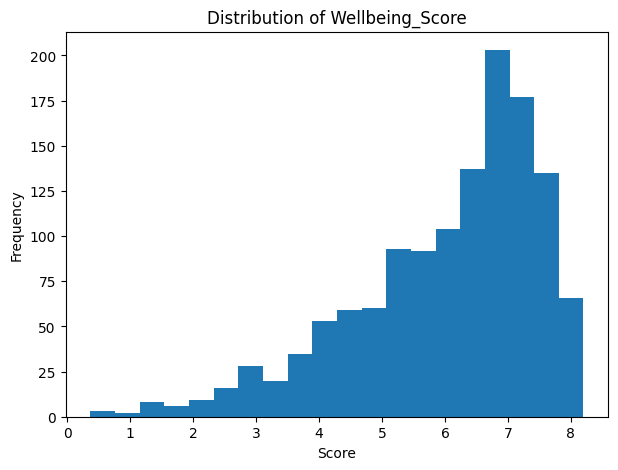

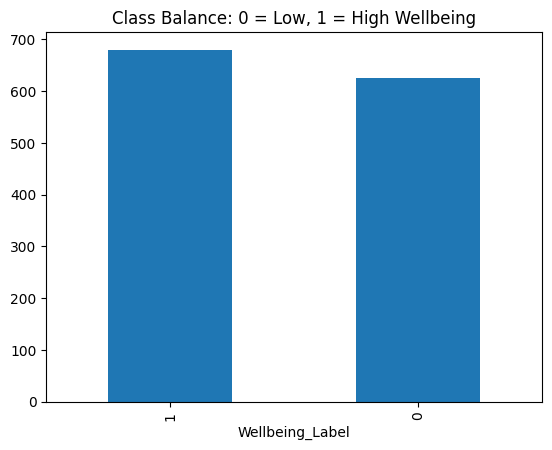

In [8]:
plt.figure(figsize=(7,5))
df["Wellbeing_Score"].plot(kind="hist", bins=20)
plt.title("Distribution of Wellbeing_Score")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

df["Wellbeing_Label"].value_counts().plot(kind="bar")
plt.title("Class Balance: 0 = Low, 1 = High Wellbeing")
plt.show()


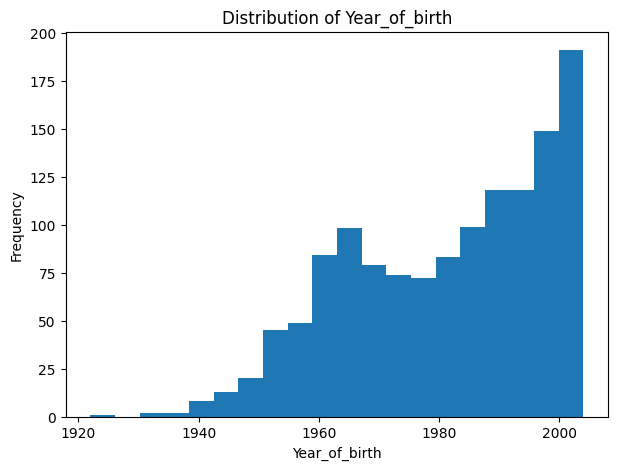

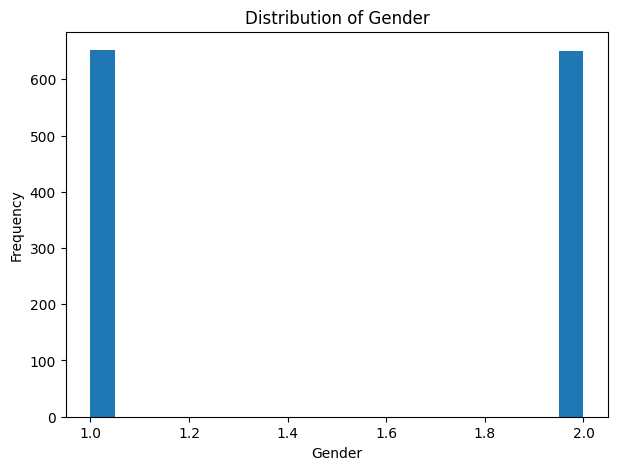

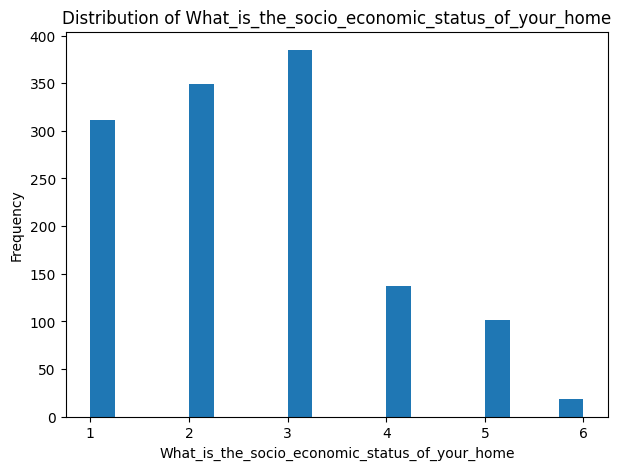

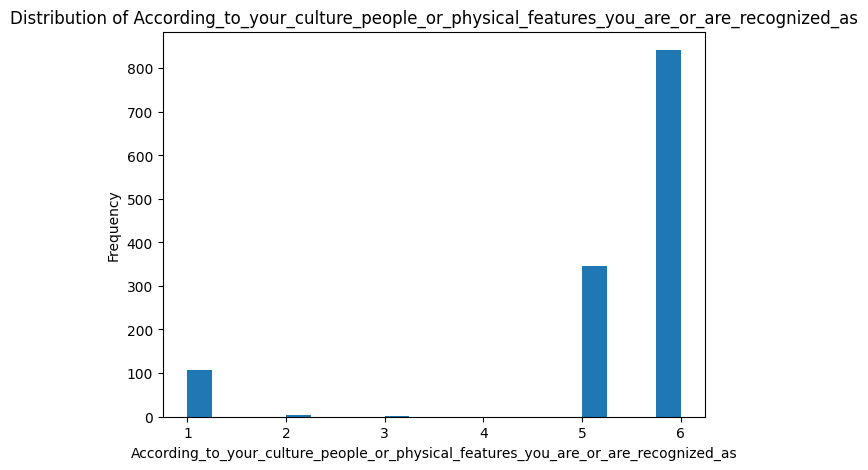

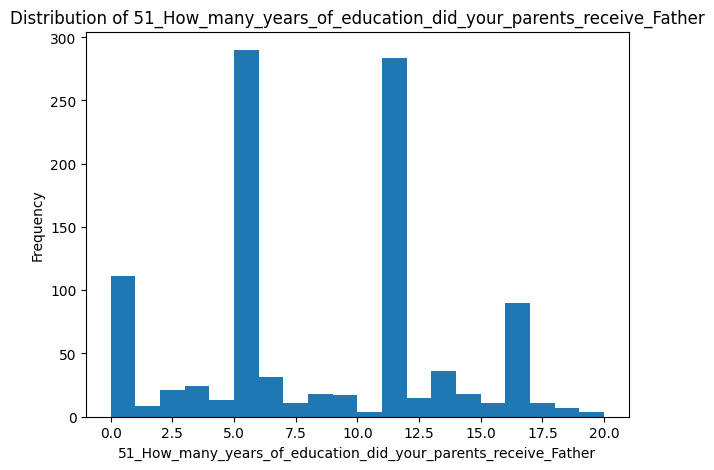

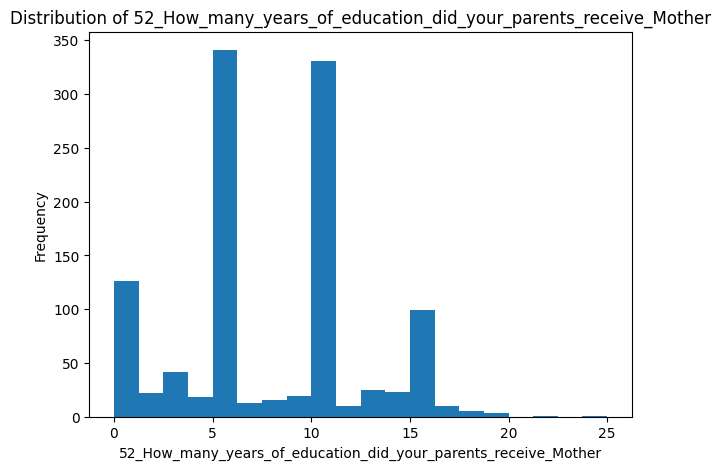

In [9]:
# Visualize distributions of demographic features
demo_cols = demo_year + demo_gender + demo_ses + demo_culture + demo_parent_edu

for col in demo_cols:
    if col in df.columns:
        plt.figure(figsize=(7,5))
        if df[col].dtype == 'object':
            df[col].value_counts().plot(kind='bar')
        else:
            df[col].plot(kind='hist', bins=20)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()

# **Model Implementation and Training**

**Dataset splitting and pre-processing**

In [10]:
# Assumes your DataFrame is already loaded as `df`
TARGET = "Wellbeing_Label"

# 1. Separate Target and Features
X = df.drop(columns=[TARGET, "Wellbeing_Score"]) # Drop Score to avoid data leakage
y = df[TARGET].astype(int)

# 2. Identify Numeric and Categorical Columns
# We need to treat them differently: Scale numbers, One-Hot Encode text
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

print(f"Numeric features: {len(numeric_features)}")
print(f"Categorical features: {len(categorical_features)}")

# 3. Create a Preprocessing Pipeline
# Numeric -> Impute missing with mean -> Scale
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Categorical -> Impute missing with 'missing' -> Convert to One-Hot (Numbers)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine them
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 4. Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5. Apply Transformations (Fit on Train, Transform Test)
# This replaces the lines that caused your error
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled  = preprocessor.transform(X_test)

print("Data successfully processed and scaled.")
print("Training shape:", X_train_scaled.shape)

Numeric features: 42
Categorical features: 0
Data successfully processed and scaled.
Training shape: (1044, 42)


**Defining Models**

In [11]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, solver="lbfgs"),
    "KNN (k=7)": KNeighborsClassifier(n_neighbors=7),
    "Gaussian NB": GaussianNB()
}


**Function for Evaluation**

In [12]:
def evaluate_model(name, model, Xtr, Xte, ytr, yte):
    # Train timing
    t0 = time()
    model.fit(Xtr, ytr)
    train_time = time() - t0

    # Predict timing
    t1 = time()
    y_pred = model.predict(Xte)
    y_proba = model.predict_proba(Xte)
    pred_time = time() - t1

    # Confusion matrix
    labels = np.unique(yte)
    cm = confusion_matrix(yte, y_pred, labels=labels)

    # Classification report (string)
    cls_report = classification_report(yte, y_pred, digits=3)

    # Accuracy / F1 (macro)
    acc = accuracy_score(yte, y_pred)
    f1m = f1_score(yte, y_pred, average="macro")

    # ROC / AUC (binary vs multiclass one-vs-rest)
    if len(labels) == 2:
        fpr, tpr, _ = roc_curve(yte, y_proba[:, 1], pos_label=labels.max())
        roc_auc = auc(fpr, tpr)

        # Plot ROC
        plt.figure(figsize=(5.2, 4.0))
        plt.plot(fpr, tpr, lw=2, label=f"AUC = {roc_auc:.3f}")
        plt.plot([0, 1], [0, 1], lw=1, linestyle="--")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC — {name}")
        plt.legend(loc="lower right")
        plt.show()
    else:
        classes_sorted = np.sort(labels)
        y_bin = label_binarize(yte, classes=classes_sorted)
        roc_auc = roc_auc_score(y_bin, y_proba, average="macro", multi_class="ovr")

        # Plot per-class ROC (OvR)
        plt.figure(figsize=(5.8, 4.2))
        for i, c in enumerate(classes_sorted):
            fpr, tpr, _ = roc_curve(y_bin[:, i], y_proba[:, i])
            plt.plot(fpr, tpr, lw=1.2, label=f"Class {c}")
        plt.plot([0, 1], [0, 1], lw=1, linestyle="--")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC (OvR) — {name} | macro AUC={roc_auc:.3f}")
        plt.legend(loc="lower right", ncol=2)
        plt.show()

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    fig, ax = plt.subplots(figsize=(4.6, 4.2))
    disp.plot(ax=ax, colorbar=False)
    plt.title(f"Confusion Matrix — {name}")
    plt.show()

    # Print classification report
    print(f"=== Classification Report — {name} ===")
    print(cls_report)

    # Return row for summary table
    return {
        "Model": name,
        "Test Accuracy": acc,
        "Test Macro-F1": f1m,
        "AUC (OvR/Binary)": roc_auc,
        "Train Time (s)": train_time,
        "Predict Time (s)": pred_time
    }


**Model Training**
- Logistic Regression
- KNN
- Gaussian NB

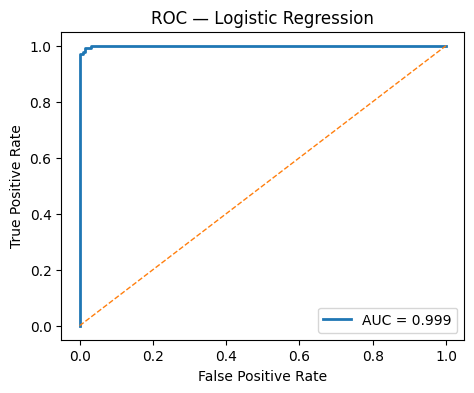

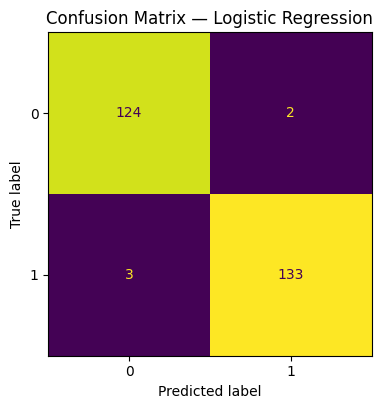

=== Classification Report — Logistic Regression ===
              precision    recall  f1-score   support

           0      0.976     0.984     0.980       126
           1      0.985     0.978     0.982       136

    accuracy                          0.981       262
   macro avg      0.981     0.981     0.981       262
weighted avg      0.981     0.981     0.981       262



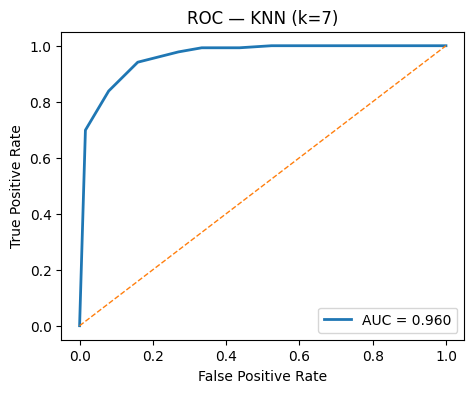

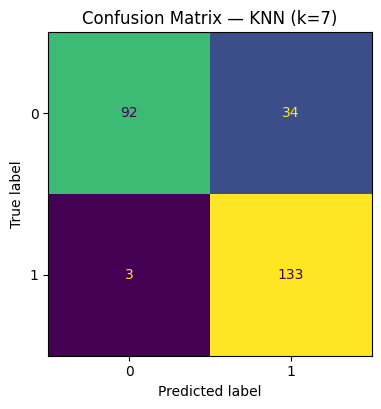

=== Classification Report — KNN (k=7) ===
              precision    recall  f1-score   support

           0      0.968     0.730     0.833       126
           1      0.796     0.978     0.878       136

    accuracy                          0.859       262
   macro avg      0.882     0.854     0.855       262
weighted avg      0.879     0.859     0.856       262



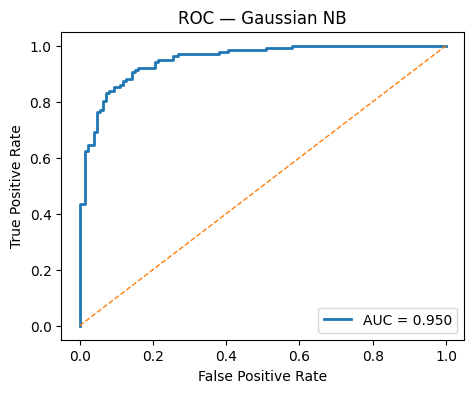

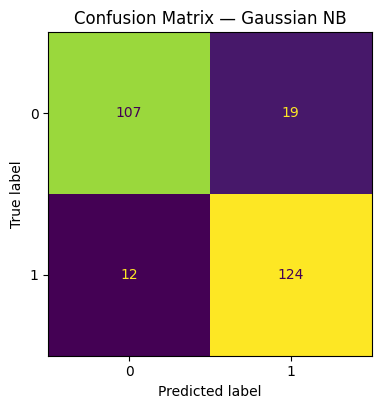

=== Classification Report — Gaussian NB ===
              precision    recall  f1-score   support

           0      0.899     0.849     0.873       126
           1      0.867     0.912     0.889       136

    accuracy                          0.882       262
   macro avg      0.883     0.880     0.881       262
weighted avg      0.883     0.882     0.881       262



,Model,Test Accuracy,Test Macro-F1,AUC (OvR/Binary),Train Time (s),Predict Time (s)
0,Logistic Regression,0.980916,0.980893,0.999475,0.025532,0.000878
1,Gaussian NB,0.881679,0.881179,0.950280,0.003686,0.001515
2,KNN (k=7),0.858779,0.855233,0.959705,0.001827,0.047109


In [13]:
results = []
for name, model in models.items():
    row = evaluate_model(name, model, X_train_scaled, X_test_scaled, y_train, y_test)
    results.append(row)

summary_df = pd.DataFrame(results).sort_values(by=["Test Accuracy", "Test Macro-F1"], ascending=False)
summary_df.reset_index(drop=True, inplace=True)
summary_df


**Stratified K-Fold Cross Validation**

In [14]:
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

def simple_cv_scores(model, X_arr, y_arr):
    accs, f1s = [], []
    for tr_idx, va_idx in skf.split(X_arr, y_arr):
        X_tr, X_va = X_arr[tr_idx], X_arr[va_idx]
        y_tr, y_va = y_arr[tr_idx], y_arr[va_idx]
        model.fit(X_tr, y_tr)
        y_hat = model.predict(X_va)
        accs.append(accuracy_score(y_va, y_hat))
        f1s.append(f1_score(y_va, y_hat, average="macro"))
    return np.mean(accs), np.std(accs), np.mean(f1s), np.std(f1s)

cv_rows = []
for name, base_model in models.items():
    # Fresh instance per model (to avoid any learned state)
    if "Logistic" in name:
        mdl = LogisticRegression(max_iter=2000, solver="lbfgs")
    elif "KNN" in name:
        mdl = KNeighborsClassifier(n_neighbors=7)
    else:
        mdl = GaussianNB()

    acc_mu, acc_sd, f1_mu, f1_sd = simple_cv_scores(mdl, X_train_scaled, y_train.values)
    cv_rows.append({
        "Model": name,
        "CV (k=5) Acc Mean": acc_mu,
        "CV Acc SD": acc_sd,
        "CV Macro-F1 Mean": f1_mu,
        "CV Macro-F1 SD": f1_sd
    })

cv_df = pd.DataFrame(cv_rows).sort_values(by=["CV (k=5) Acc Mean", "CV Macro-F1 Mean"], ascending=False)
cv_df.reset_index(drop=True, inplace=True)
cv_df


,Model,CV (k=5) Acc Mean,CV Acc SD,CV Macro-F1 Mean,CV Macro-F1 SD
0,Logistic Regression,0.973169,0.010348,0.973106,0.010364
1,Gaussian NB,0.890794,0.018325,0.890590,0.018307
2,KNN (k=7),0.876426,0.021548,0.874789,0.021925


# **optimization of model's parameter using Random Search**

In [15]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the hyperparameters to test for each model
param_grids = {
    "Logistic Regression": {
        'C': np.logspace(-4, 4, 20),      # Regularization strength
        'solver': ['liblinear', 'lbfgs']
    },
    "KNN (k=7)": {
        'n_neighbors': range(3, 21),      # Try neighbors from 3 to 20
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    "Gaussian NB": {
        'var_smoothing': np.logspace(-9, -1, 10) # Stability calculation
    }
}

**Setting stratified k-fold validation and Optimization Loop**

In [16]:
# 2. Stratified K-Fold Strategy
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Storage for results and best models for plotting later
evaluation_data = []
best_models_dict = {}

print(f"{'Model':<20} | {'Status':<15}")
print("-" * 40)

for name, model in models.items():
    print(f"{name:<20} | Optimizing...")

    # --- Robust Data Handling (Sparse vs Dense) ---
    if hasattr(X_train_scaled, "toarray"):
        if name == "Gaussian NB":
            X_train_run = X_train_scaled.toarray()
            X_test_run = X_test_scaled.toarray()
        else:
            X_train_run = X_train_scaled
            X_test_run = X_test_scaled
    else:
        X_train_run = X_train_scaled
        X_test_run = X_test_scaled

    # --- Select Grid ---
    if "KNN" in name:
        grid = param_grids["KNN (k=7)"]
    elif "Gaussian" in name:
        grid = param_grids["Gaussian NB"]
    else:
        grid = param_grids["Logistic Regression"]

    # --- Hyperoptimization (Random Search) ---
    rs = RandomizedSearchCV(
        estimator=model,
        param_distributions=grid,
        n_iter=15,
        cv=cv_strategy,
        scoring='accuracy',
        n_jobs=-1,
        random_state=42
    )

    rs.fit(X_train_run, y_train)

    # --- Collect Stats ---
    best_index = rs.best_index_
    cv_mean = rs.cv_results_['mean_test_score'][best_index]
    cv_std = rs.cv_results_['std_test_score'][best_index]

    # --- Final Test Prediction ---
    best_model = rs.best_estimator_
    best_models_dict[name] = best_model # Save for plotting
    y_pred = best_model.predict(X_test_run)

    metrics = {
        "Model": name,
        "CV Mean Accuracy": cv_mean,
        "CV Std Dev": cv_std,
        "Test Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred, average='weighted'),
        "Best Config": rs.best_params_
    }
    evaluation_data.append(metrics)

print("-" * 40)
print("Optimization Complete.\n")

Model                | Status         
----------------------------------------
Logistic Regression  | Optimizing...
KNN (k=7)            | Optimizing...
Gaussian NB          | Optimizing...
----------------------------------------
Optimization Complete.



/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 10 is smaller than n_iter=15. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


**Evaluation of the models after optimization**

In [17]:
# 1. Create DataFrame
summary_df = pd.DataFrame(evaluation_data)
summary_df.set_index("Model", inplace=True)

# 2. Print Summary Matrix
print("="*80)
print("SUMMARIZED EVALUATION MATRIX (Sorted by CV Mean Accuracy)")
print("="*80)
cols = ["CV Mean Accuracy", "CV Std Dev", "Test Accuracy", "F1 Score"]
print(summary_df[cols].sort_values(by="CV Mean Accuracy", ascending=False).round(4))

# 3. Print Best Configurations
print("\n" + "="*80)
print("BEST MODEL CONFIGURATIONS")
print("="*80)
for index, row in summary_df.iterrows():
    print(f"[{index}]")
    print(f"{row['Best Config']}")
    print("-" * 40)

SUMMARIZED EVALUATION MATRIX (Sorted by CV Mean Accuracy)
                     CV Mean Accuracy  CV Std Dev  Test Accuracy  F1 Score
Model                                                                     
Logistic Regression            0.9722      0.0140         0.9885    0.9886
Gaussian NB                    0.8918      0.0207         0.8817    0.8815
KNN (k=7)                      0.8841      0.0186         0.8740    0.8726

BEST MODEL CONFIGURATIONS
[Logistic Regression]
{'solver': 'liblinear', 'C': np.float64(29.763514416313132)}
----------------------------------------
[KNN (k=7)]
{'weights': 'uniform', 'n_neighbors': 8, 'metric': 'euclidean'}
----------------------------------------
[Gaussian NB]
{'var_smoothing': np.float64(0.0016681005372000558)}
----------------------------------------


**Visualizations**

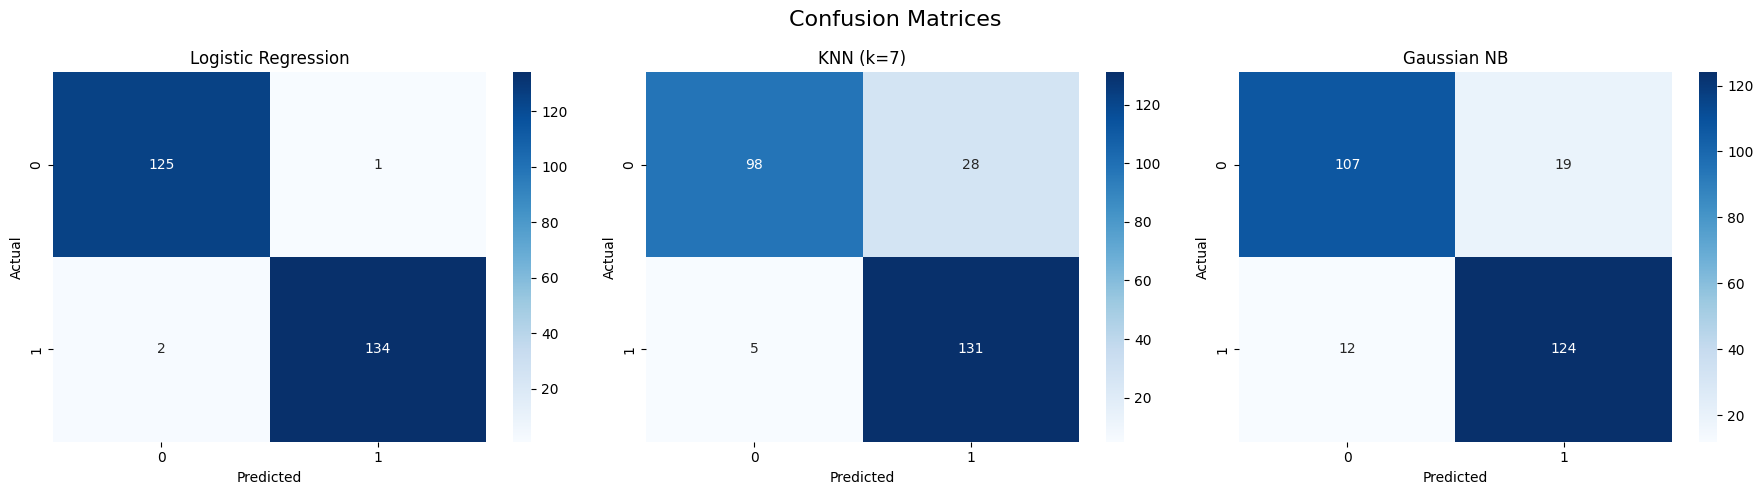


Plotting ROC Curves...


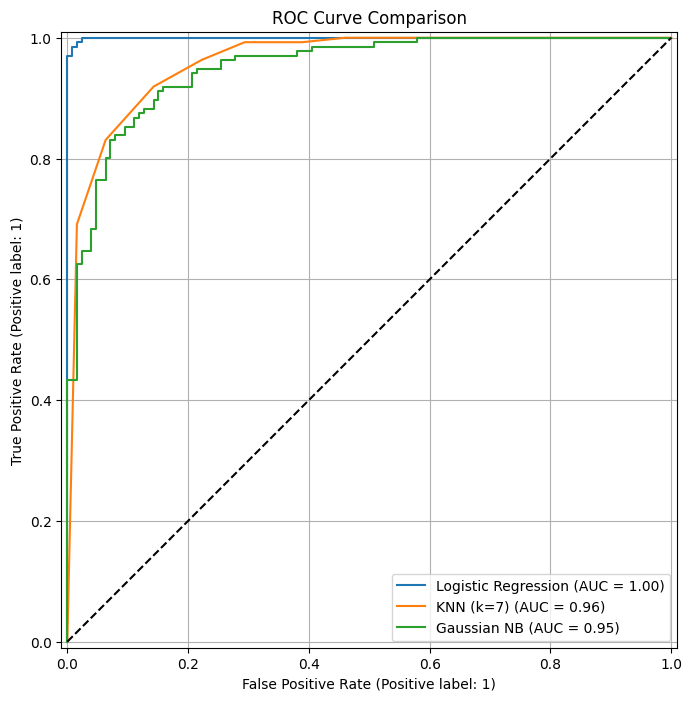

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, RocCurveDisplay # <--- Imported here

# Check if binary classification (ROC is only for Binary targets)
is_binary = len(np.unique(y)) == 2

# 1. Plot Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Confusion Matrices', fontsize=16)

for ax, (name, model) in zip(axes, best_models_dict.items()):
    # Handle Gaussian NB dense requirement
    if hasattr(X_test_scaled, "toarray") and name == "Gaussian NB":
        X_test_plot = X_test_scaled.toarray()
    else:
        X_test_plot = X_test_scaled

    y_pred = model.predict(X_test_plot)
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

# 2. Plot ROC Curve (Only runs if you have 2 classes, e.g., 0 and 1)
if is_binary:
    print("\nPlotting ROC Curves...")
    plt.figure(figsize=(10, 8))

    for name, model in best_models_dict.items():
        # Handle Gaussian NB dense requirement
        if hasattr(X_test_scaled, "toarray") and name == "Gaussian NB":
            X_test_plot = X_test_scaled.toarray()
        else:
            X_test_plot = X_test_scaled

        # Create ROC Display
        RocCurveDisplay.from_estimator(model, X_test_plot, y_test, ax=plt.gca(), name=name)

    plt.title('ROC Curve Comparison')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.grid(True)
    plt.show()
else:
    print(f"\nSkipping ROC Curve. Found {len(np.unique(y))} classes (Multiclass). ROC is typically for Binary (2 classes).")

# **Strongest Predictors of Wellbeing**

### **Objective**
To identify which socioeconomic or demographic variables emerge as the strongest predictors of subjective wellbeing.

### **Methodology**
We will analyze the **coefficients** of the Logistic Regression model trained in the previous step.
* **Positive Coefficients:** Indicate features that increase the likelihood of High Wellbeing.
* **Negative Coefficients:** Indicate features that decrease the likelihood of High Wellbeing (or predict Low Wellbeing).
* **Magnitude:** The absolute size of the coefficient represents the strength of the prediction.

The code below extracts these coefficients from the model pipeline, maps them back to the original feature names (including the one-hot encoded categories), and visualizes the top 20 most influential factors.

Found 42 numeric and 0 categorical features.
Top 10 Strongest Predictors:
                                             Feature  Coefficient
0             How_much_stress_did_you_feel_yesterday    -3.180184
1               How_depressed_did_you_feel_yesterday    -2.956156
2   How_lonely_or_unsupported_did_you_feel_yesterday    -2.693878
3  How_much_did_you_enjoy_the_activities_you_did_...     2.399866
4                   How_much_did_you_laugh_yesterday     2.358236
5                   How_happy_did_you_feel_yesterday     1.911585
6  In_general_how_satisfied_are_you_with_all_aspe...     1.631903
7  Please_answer_on_a_scale_of_0_to_4_where_0_is_...    -1.337013
8  Over_the_last_two_weeks_how_often_have_you_bee...    -0.910008
9  Over_the_last_two_weeks_how_often_have_you_bee...    -0.783794


/tmp/ipython-input-3405457762.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=top_20, palette=colors)
/tmp/ipython-input-3405457762.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


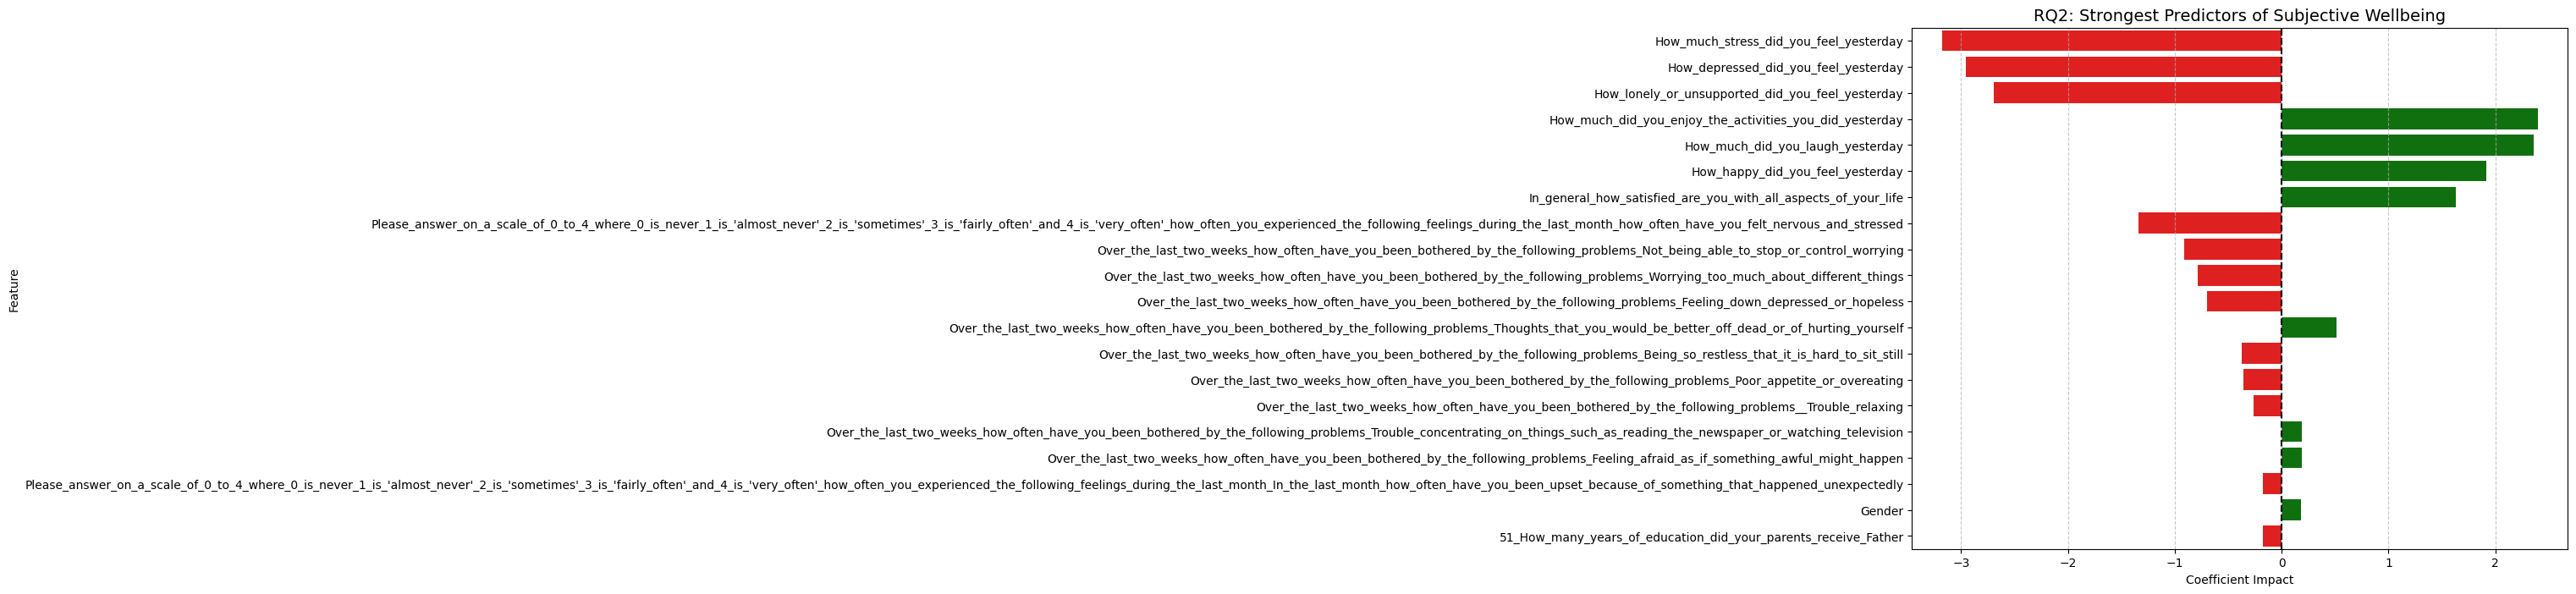

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# --- 1. SETUP & RE-DEFINE PREPROCESSOR ---
# Ensure we have the fresh definitions
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns

print(f"Found {len(numeric_features)} numeric and {len(categorical_features)} categorical features.")

# Numeric Pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Categorical Pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine into Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    verbose_feature_names_out=False  # This simplifies the output names if available
)

# --- 2. FIT PREPROCESSOR & EXTRACT NAMES AUTOMATICALLY ---
# Fit first
preprocessor.fit(X_train, y_train)

# Transform data
X_train_processed = preprocessor.transform(X_train)

# AUTOMATED FEATURE NAME EXTRACTION (The Fix)
# Instead of digging into sub-pipelines, we ask the main preprocessor for the final names.
try:
    # Modern Scikit-Learn (v1.0+)
    all_feature_names = preprocessor.get_feature_names_out()
except AttributeError:
    # Fallback for older versions: Manually construct names using the safe method
    # This block only runs if the simple method fails
    ohe = preprocessor.named_transformers_['cat']['onehot']
    ohe_names = ohe.get_feature_names_out(categorical_features)
    all_feature_names = np.r_[numeric_features, ohe_names]

# Clean up names (Optional: remove "num__" or "cat__" prefixes for readability)
all_feature_names = [name.replace('num__', '').replace('cat__onehot__', '').replace('cat__', '') for name in all_feature_names]

# --- 3. TRAIN MODEL & VISUALIZE ---
lr_model = LogisticRegression(max_iter=2000, solver="lbfgs")
lr_model.fit(X_train_processed, y_train)

# Create DataFrame
coef_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Coefficient': lr_model.coef_[0]
})

# Sort by strength
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False).reset_index(drop=True)

# Plot
print("Top 10 Strongest Predictors:")
print(coef_df[['Feature', 'Coefficient']].head(10))

plt.figure(figsize=(10, 8))
top_20 = coef_df.head(20)
colors = ['green' if x > 0 else 'red' for x in top_20['Coefficient']]

sns.barplot(x='Coefficient', y='Feature', data=top_20, palette=colors)
plt.title('RQ2: Strongest Predictors of Subjective Wellbeing', fontsize=14)
plt.xlabel('Coefficient Impact')
plt.axvline(0, color='black', linestyle='--')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# **Impact of Categorical Encoding**

### **Objective**
To determine if the inclusion of dummy variables and advanced categorical encoding techniques significantly improves predictive performance compared to simpler encodings.

### **Experimental Design**
We will conduct a controlled experiment by training the same classification model (Logistic Regression) on two different versions of the dataset:

1.  **Baseline (Simple Encoding):**
    * Categorical variables are transformed using `OrdinalEncoder`.
    * This assigns a simple integer (0, 1, 2...) to each category, assuming an arbitrary order.

2.  **Advanced (One-Hot Encoding):**
    * Categorical variables are transformed using `OneHotEncoder`.
    * This creates binary "dummy" variables (0 or 1) for every unique category, preventing the model from assuming false ordinal relationships.

### **Evaluation**
We will compare the **Accuracy** and **Macro F1-Score** of both approaches to quantify the "lift" provided by the advanced encoding technique.

Running RQ3 Experiment...

=== RQ3 Results Table ===
                        Method  Accuracy  Macro F1
0    Simple Encoding (Ordinal)  0.980916  0.980893
1  Advanced Encoding (One-Hot)  0.980916  0.980893

Conclusion: Advanced encoding changed accuracy by 0.00 percentage points.


/tmp/ipython-input-1376441983.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Method", y="Accuracy", data=df_rq3, palette="viridis")


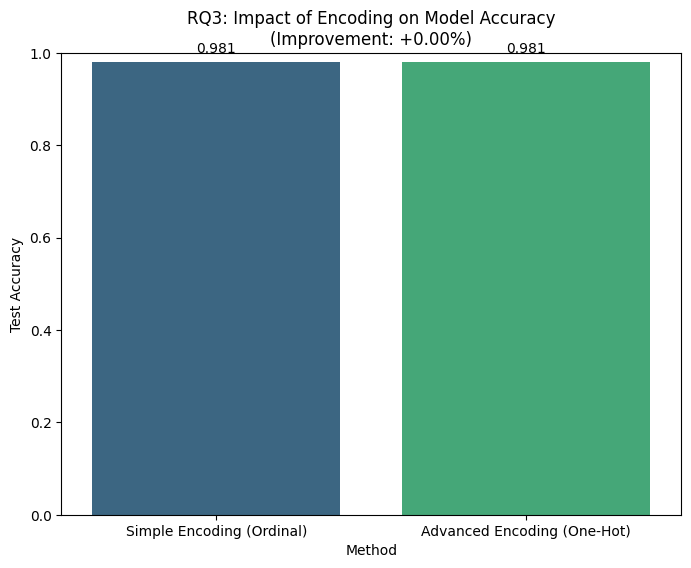

In [20]:
from sklearn.preprocessing import OrdinalEncoder

# --- STEP 1: DEFINE TWO DIFFERENT PIPELINES ---

# A. The "Simple" Pipeline (Ordinal Encoding)
# We treat categories as simple integers (0, 1, 2...)
categorical_transformer_simple = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

preprocessor_simple = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer_simple, categorical_features)
    ])

# B. The "Advanced" Pipeline (One-Hot / Dummy Encoding)
# We create binary columns for every category (0 or 1)
categorical_transformer_advanced = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor_advanced = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer_advanced, categorical_features)
    ])

# --- STEP 2: RUN THE EXPERIMENT ---

results_rq3 = []
pipelines = {
    "Simple Encoding (Ordinal)": preprocessor_simple,
    "Advanced Encoding (One-Hot)": preprocessor_advanced
}

print("Running RQ3 Experiment...")

for name, preproc in pipelines.items():
    # 1. Fit the specific preprocessor
    X_tr_processed = preproc.fit_transform(X_train, y_train)
    X_te_processed = preproc.transform(X_test)

    # 2. Train the SAME model (Logistic Regression)
    # We use the same random_state to ensure fairness
    clf = LogisticRegression(max_iter=2000, solver='lbfgs', random_state=42)
    clf.fit(X_tr_processed, y_train)

    # 3. Predict
    y_pred = clf.predict(X_te_processed)

    # 4. Record Metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')

    results_rq3.append({
        "Method": name,
        "Accuracy": acc,
        "Macro F1": f1
    })

# --- STEP 3: ANALYZE AND VISUALIZE ---

df_rq3 = pd.DataFrame(results_rq3)
print("\n=== RQ3 Results Table ===")
print(df_rq3)

# Calculate Improvement
simple_acc = df_rq3.loc[df_rq3['Method'] == "Simple Encoding (Ordinal)", "Accuracy"].values[0]
adv_acc = df_rq3.loc[df_rq3['Method'] == "Advanced Encoding (One-Hot)", "Accuracy"].values[0]
improvement = (adv_acc - simple_acc) * 100

print(f"\nConclusion: Advanced encoding changed accuracy by {improvement:.2f} percentage points.")

# Visualization
plt.figure(figsize=(8, 6))
sns.barplot(x="Method", y="Accuracy", data=df_rq3, palette="viridis")
plt.title(f"RQ3: Impact of Encoding on Model Accuracy\n(Improvement: {improvement:+.2f}%)")
plt.ylabel("Test Accuracy")
plt.ylim(0, 1.0) # Set limit to 0-1 for clarity
for index, row in df_rq3.iterrows():
    plt.text(index, row.Accuracy + 0.02, f"{row.Accuracy:.3f}", color='black', ha="center")
plt.show()